In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('IIOT-temp-warn-max.csv')
df=pd.DataFrame(data,columns=['room_id/id', 'noted_date', 'temp', 'out/in', 'Month', 'name_months','temp_warn'])



In [8]:
df

,room_id/id,noted_date,temp,out/in,Month,name_months,temp_warn
0,Room Admin,08-12-2018 09:30,29,In,12,December,0
1,Room Admin,08-12-2018 09:30,29,In,12,December,0
2,Room Admin,08-12-2018 09:29,41,Out,12,December,0
3,Room Admin,08-12-2018 09:29,41,Out,12,December,0
4,Room Admin,08-12-2018 09:29,31,In,12,December,0
...,...,...,...,...,...,...,...
97602,Room Admin,28-07-2018 07:07,31,In,7,July,0
97603,Room Admin,28-07-2018 07:07,31,In,7,July,0
97604,Room Admin,28-07-2018 07:06,31,In,7,July,0
97605,Room Admin,28-07-2018 07:06,31,In,7,July,0


In [9]:
df.describe()

,temp,Month,temp_warn
count,97607.000000,97607.000000,97607.000000
mean,35.054033,9.755643,0.089717
std,5.699885,0.940415,0.285777
min,21.000000,7.000000,0.000000
25%,30.000000,9.000000,0.000000
50%,35.000000,10.000000,0.000000
75%,40.000000,10.000000,0.000000
max,51.000000,12.000000,1.000000


In [10]:
# Codificar la columna 'out/in' a valores numéricos
le = LabelEncoder()
df['out/in_encoded'] = le.fit_transform(df['out/in'])

# Características: Temperatura, Ubicación (dentro o fuera), Mes
X = df[['temp', 'out/in_encoded', 'Month']]
y = df['temp_warn']  # Etiquetas: Warnings correspondientes (0 o 1)

# División de datos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}



Training and evaluating Logistic Regression...


Accuracy for Logistic Regression: 1.0
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88850
           1       1.00      1.00      1.00      8757

    accuracy                           1.00     97607
   macro avg       1.00      1.00      1.00     97607
weighted avg       1.00      1.00      1.00     97607

Confusion matrix for Logistic Regression:
[[88850     0]
 [    0  8757]]


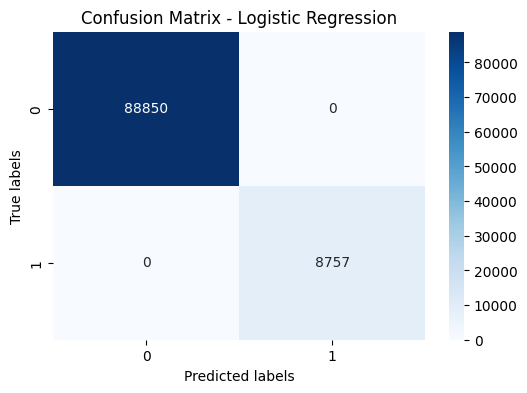


Training and evaluating Decision Tree...
Accuracy for Decision Tree: 1.0
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88850
           1       1.00      1.00      1.00      8757

    accuracy                           1.00     97607
   macro avg       1.00      1.00      1.00     97607
weighted avg       1.00      1.00      1.00     97607

Confusion matrix for Decision Tree:
[[88850     0]
 [    0  8757]]


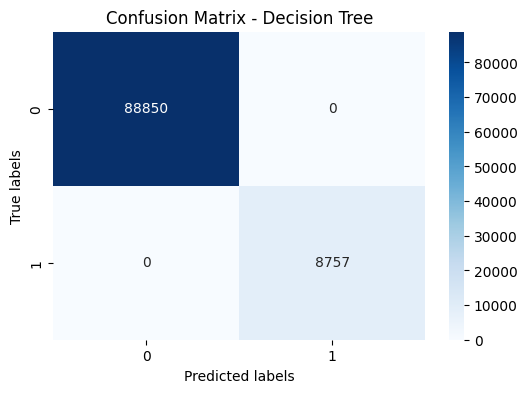


Training and evaluating Random Forest...
Accuracy for Random Forest: 0.9999897548331574
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88850
           1       1.00      1.00      1.00      8757

    accuracy                           1.00     97607
   macro avg       1.00      1.00      1.00     97607
weighted avg       1.00      1.00      1.00     97607

Confusion matrix for Random Forest:
[[88850     0]
 [    1  8756]]


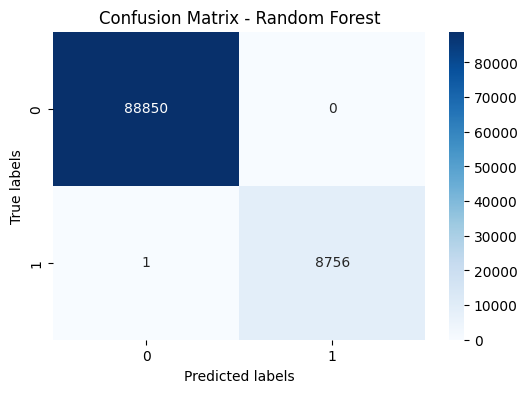


Training and evaluating SVM...
Accuracy for SVM: 0.9815689448502669
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     88850
           1       1.00      0.79      0.89      8757

    accuracy                           0.98     97607
   macro avg       0.99      0.90      0.94     97607
weighted avg       0.98      0.98      0.98     97607

Confusion matrix for SVM:
[[88850     0]
 [ 1799  6958]]


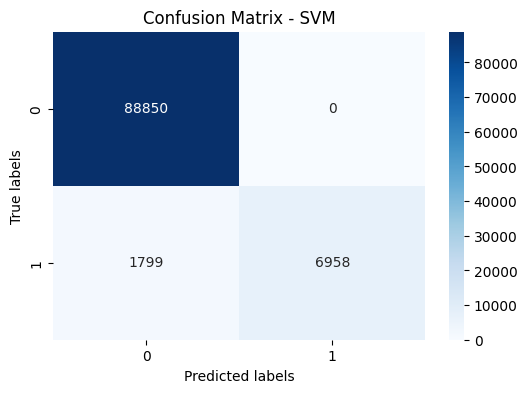


Training and evaluating KNN...
Accuracy for KNN: 0.9999487741657873
Classification report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88850
           1       1.00      1.00      1.00      8757

    accuracy                           1.00     97607
   macro avg       1.00      1.00      1.00     97607
weighted avg       1.00      1.00      1.00     97607

Confusion matrix for KNN:
[[88850     0]
 [    5  8752]]


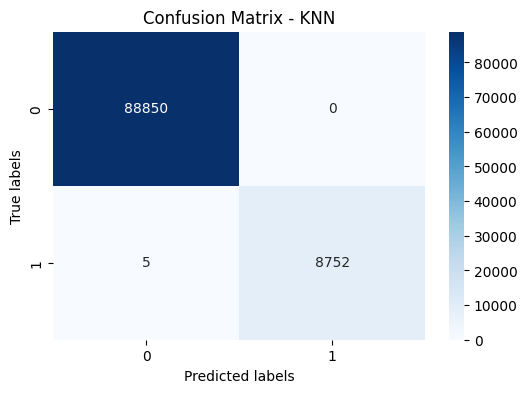

In [11]:
# Entrenamiento y evaluación de modelos con K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    y_pred = cross_val_predict(model, X, y, cv=kf)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    print(f"Accuracy for {name}: {accuracy}")
    print(f"Classification report for {name}:\n{report}")
    print(f"Confusion matrix for {name}:\n{confusion}")

    # Visualización de la matriz de confusión con seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("") 